In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(42)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Removing unwanted columns

In [4]:
unwanted_cols = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(unwanted_cols, inplace=True, axis=1)

In [5]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
cat_cols = df.columns[df.dtypes == 'object']
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

Categorical columns: Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category

In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No Null values present

# Visualization

<AxesSubplot:>

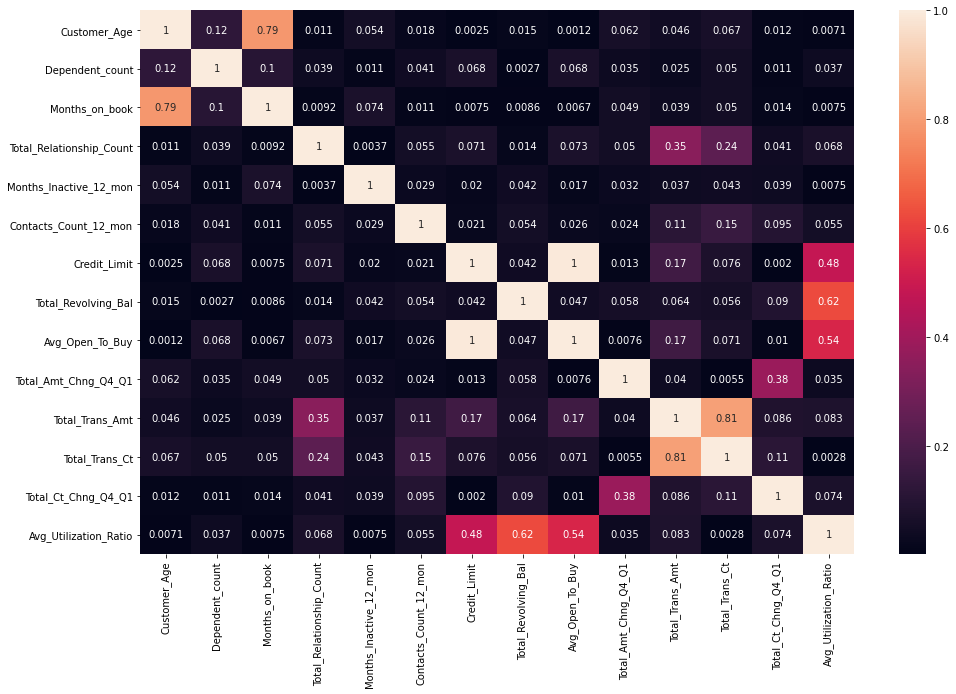

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr.abs(), 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

**Visualize categorical columns**

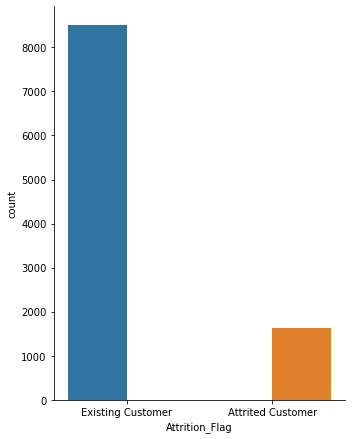

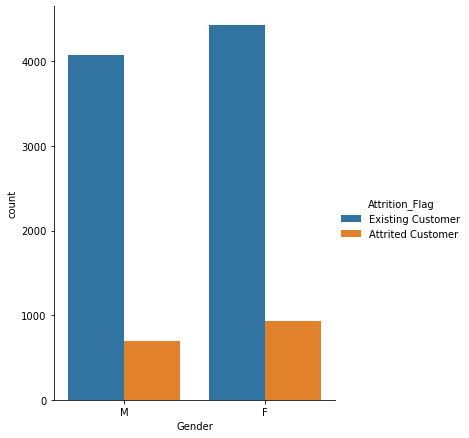

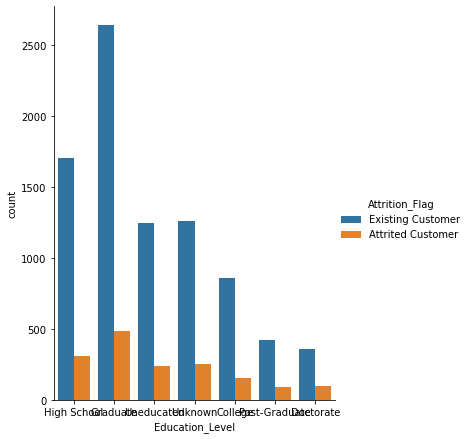

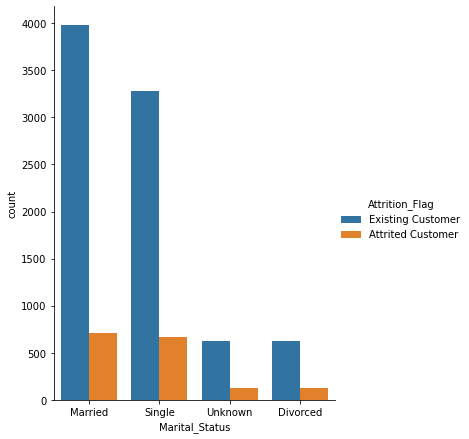

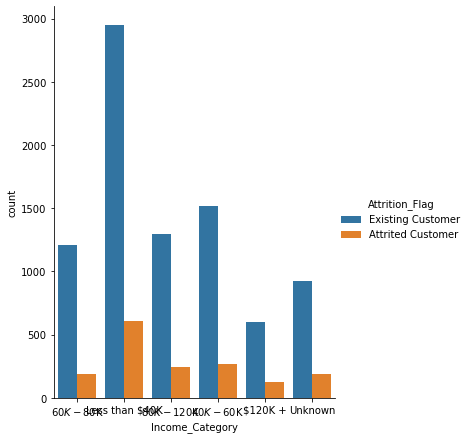

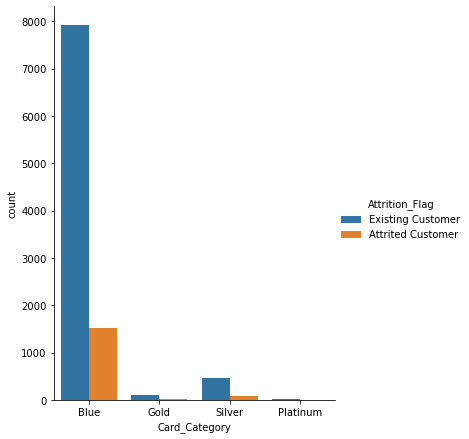

In [9]:

for col in cat_cols:
    g = sns.catplot(x=col,
                hue="Attrition_Flag",
                data=df, kind="count",
                height=6, aspect=.8)
plt.show()

# Pre-processing

Label encoding the categorical columns

In [10]:
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [11]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({'Existing Customer':0, 'Attrited Customer':1})

In [12]:
df["Gender"] = df.Gender.map({'M':0, 'F':1})

In [13]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [14]:
education_mappping = {
    "Uneducated":0,
    "High School":1,
    "Graduate": 2,
    "College": 3,
    "Post-Graduate":4,
    "Doctorate":5,
    "Unknown": -9
}
df["Education_Level"] = df["Education_Level"].map(education_mappping)

In [15]:
df["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [16]:
df["Marital_Status"] = df["Marital_Status"].map({'Married':1, 'Single':0, 'Unknown':-99, 'Divorced':2})

In [17]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [18]:
earning_map = {
    '$60K - $80K':2, 'Less than $40K':0, '$80K - $120K':3, '$40K - $60K':1,
       '$120K +':4, 'Unknown':-999
}
df["Income_Category"] = df["Income_Category"].map(earning_map)

In [19]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [20]:
df["Card_Category"] = df["Card_Category"].map({'Blue':0, 'Gold':2, 'Silver':1, 'Platinum':3})

In [21]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,-99,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Model

In [23]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [24]:
target = df["Attrition_Flag"]
df.drop(["Attrition_Flag"], inplace=True, axis=1)

In [25]:
df.shape

(10127, 19)

In [26]:
target.shape

(10127,)

**Prepare the train-test sets**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, target,test_size=0.2, stratify=target)

In [28]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
xgb_model = XGBClassifier(
    learning_rate=0.09,
    n_estimators=250,
    max_depth=3,
    objective= 'binary:logistic',
    subsample = 0.75,
    alpha= 0.01,
    gamma= 0.1,
    min_child_weight = 3,
    use_label_encoder = False,
    colsample_bytree = 0.8,
    eval_metric='logloss'
                     )
# scores = cross_val_score(xgb_model, X_train, y_train, scoring='accuracy', cv=cv)
# print(scores*100)
# print("XGB cross validation score:",mean(scores)*100)

**Testing the XGB model**

In [29]:
xgb_model.fit(X_train, y_train)
from sklearn.metrics import roc_auc_score
y_train_pred = xgb_model.predict(X_train)
print("LGB train accuracy:",roc_auc_score(y_train_pred,y_train)*100)
y_pred = xgb_model.predict(X_test)
print("XGB test accuracy:",roc_auc_score(y_pred,y_test)*100)

LGB train accuracy: 97.8600103905918
XGB test accuracy: 97.04776350507971


In [30]:
lgb_model = LGBMClassifier(learning_rate=0.09,
                       num_leaves = 250,
                       boosting_type='gbdt',
                       objective='binary',
                       metric='binary_logloss,auc',
                       max_depth = 3,
                       n_estimators=2500, subsample_for_bin=40000, 
                       min_split_gain=2, min_child_weight=2, min_child_samples=5, subsample=0.9)

**Testing the LGB model**

In [31]:
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
print("LGB train accuracy:",roc_auc_score(y_train_pred,y_train)*100)
y_pred = lgb_model.predict(X_test)
print("LGB test accuracy:",roc_auc_score(y_pred,y_test)*100)

LGB train accuracy: 97.34345670246854
LGB test accuracy: 96.74153453794987
